In [16]:
import rasterio
import numpy as np
from rasterio.plot import show
import matplotlib.pyplot as plt
from rasterio.plot import show_hist
import matplotlib
import seaborn as sns
import geopandas as gpd

#Call Scripts
import sys
sys.path.append("./scripts")
import NBR 

In [17]:
#Open pre wildfire clipped images
NIR_clipped_pre = rasterio.open('./test_images/NIR_pre_clipped.tif')
SWIR_clipped_pre = rasterio.open('./test_images/SWIR_pre_clipped.tif')

#Open ppost wildfire clipped images
NIR_clipped_post = rasterio.open('./test_images/NIR_post_clipped.tif')
SWIR_clipped_post = rasterio.open('./test_images/SWIR_post_clipped.tif')

In [18]:
#Calling NBR_Calc function to calculate pre and post wildfire.
NBR.NBR_Calc(NIR_clipped_pre, SWIR_clipped_pre, 'NBR_pre.tif')
NBR.NBR_Calc(NIR_clipped_post, SWIR_clipped_post, 'NBR_post.tif')

In [19]:
#Open NBR images
NBR_pre = rasterio.open('NBR_pre.tif')
NBR_post = rasterio.open('NBR_post.tif')

### According to histograms which are below the change is obvious.

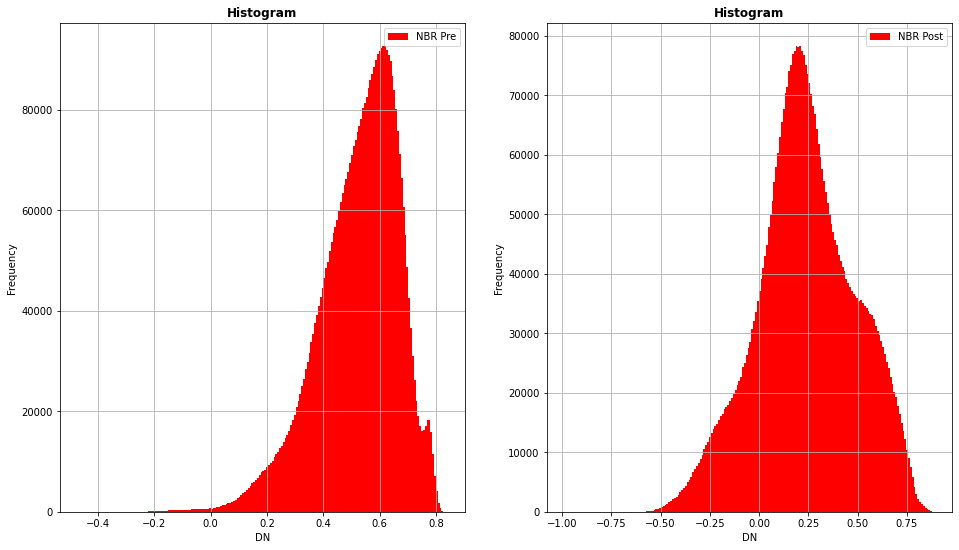

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,9))
show_hist(NBR_pre, bins=200, stacked=False, label='NBR Pre', ax=ax1)
show_hist(NBR_post, bins=200, stacked=False, label='NBR Post', ax=ax2)

In [21]:
#Call dnbr function to calculate dnbr
NBR.dnbr(NBR_pre, NBR_post)

In [22]:
#open dnbr
dnbr = rasterio.open('dnbr.tif')

In [23]:
dnbr_copy = dnbr.read().copy()

#Reclassify to detect classes which are 
dnbr_copy[np.where(dnbr_copy > 0.66)] = 5                           #High severity burn
dnbr_copy[np.where((dnbr_copy > 0.44) & (dnbr_copy <= 0.66))] = 4   #Moderate-high severity burn
dnbr_copy[np.where((dnbr_copy > 0.27) & (dnbr_copy <= 0.44))] = 3   #Moderate-low severity burn
dnbr_copy[np.where((dnbr_copy > 0.1) & (dnbr_copy <= 0.27))] = 2    #Low-severity burn
dnbr_copy[np.where(dnbr_copy <= 0.1)] = 1                           #Unburned

### The code below shows the specific level of burn

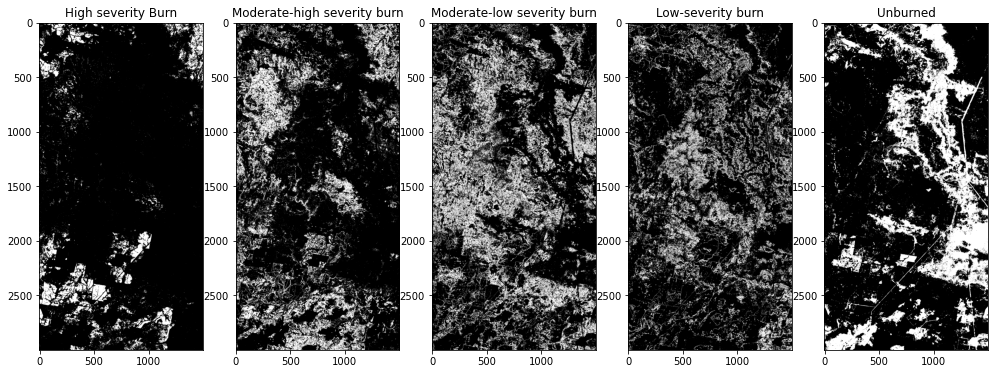

In [24]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1, 5, figsize=(17,17))
ax1.imshow(dnbr_copy[0] == 5, cmap='gray')
ax1.title.set_text('High severity Burn')
ax2.imshow(dnbr_copy[0] == 4, cmap='gray')
ax2.title.set_text('Moderate-high severity burn')
ax3.imshow(dnbr_copy[0] == 3, cmap='gray')
ax3.title.set_text('Moderate-low severity burn')
ax4.imshow(dnbr_copy[0] == 2, cmap='gray')
ax4.title.set_text('Low-severity burn')
ax5.imshow(dnbr_copy[0] == 1, cmap='gray')
ax5.title.set_text('Unburned')
plt.show()

## Creating burn severity map with legend

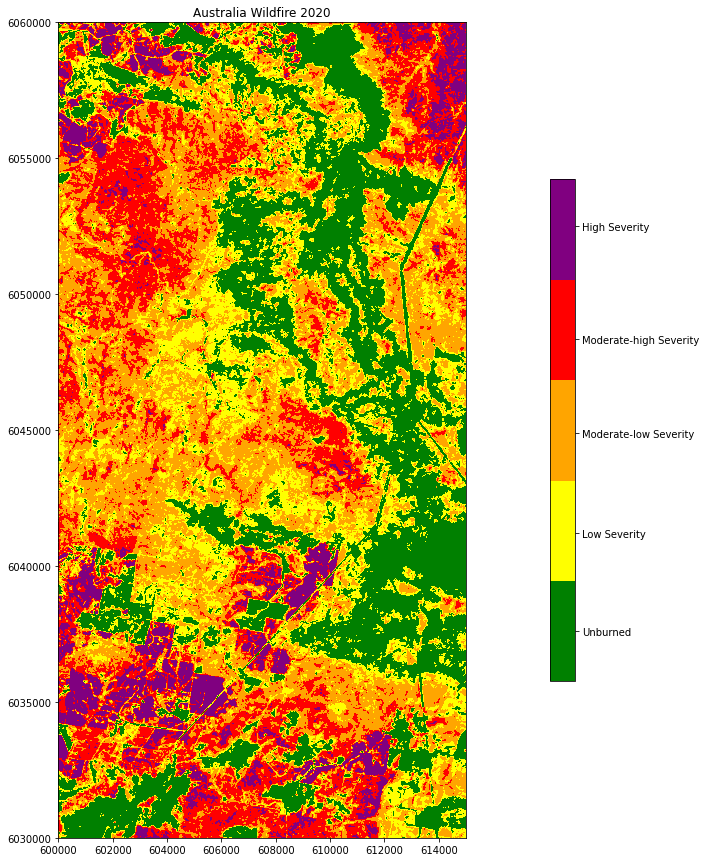

In [25]:
#Creating color map
cmap = matplotlib.colors.ListedColormap(['green','yellow','orange','red','purple'])
#Creating figure
fig, ax = plt.subplots(1, figsize=(15, 15))
plt.ticklabel_format(style = 'plain')
plt.title('Australia Wildfire 2020')
bounds = [-0.5, 0.1, 0.27, 0.440, 0.660, 1.3]    
norm = matplotlib.colors.BoundaryNorm(bounds, 5)
cax = ax.imshow(dnbr.read()[0], cmap=cmap, norm=norm)
show(dnbr.read(),ax=ax, cmap=cmap, norm=norm, transform=dnbr.transform)

cbar = fig.colorbar(cax, ax=ax, fraction=0.03, pad=0.1, ticks=[-0.2, 0.18, 0.35, 0.53, 1])
cbar.ax.set_yticklabels(['Unburned', 'Low Severity', 'Moderate-low Severity', 'Moderate-high Severity', 'High Severity'])

plt.show()


/home/volkan/anaconda3/envs/MaskRCNN/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


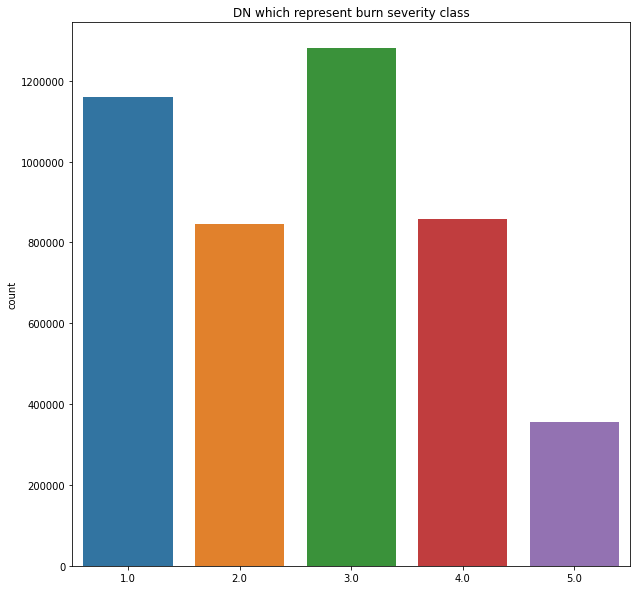

In [26]:
#Draw pixel classified dnbr pixel values
fig, ax = plt.subplots(1, figsize=(10, 10))
sns.countplot(dnbr_copy[0].flatten())
ax.set_title('DN which represent burn severity class')
ax.ticklabel_format(style='plain', axis='y')
#'Unburned', 'Low Severity', 'Moderate-low Severity', 'Moderate-high Severity', 'High Severity'
plt.show()

In [27]:
Values = [np.sum(dnbr_copy == 1) *10 * 10 / 10000, np.sum(dnbr_copy == 2) *10 * 10 / 10000, np.sum(dnbr_copy == 3) *10 * 10 / 10000, np.sum(dnbr_copy == 4) *10 * 10 / 10000, np.sum(dnbr_copy == 5) *10 * 10 / 10000]
labels = ["Unburned", "Low Severity", "Moderate-low severity", "Moderate-high Severity", "High Severity"]
for i in range(len(labels)):
    print(labels[i], ": \t", Values[i], "hectares")

Unburned : 	 11596.39 hectares
Low Severity : 	 8464.63 hectares
Moderate-low severity : 	 12807.42 hectares
Moderate-high Severity : 	 8583.7 hectares
High Severity : 	 3547.86 hectares
